Figure S5 from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the PSDs of two measurements under low and high LDPS sensor obscuration levels. The figure is in the SI.

Plot type: Line plot

In [1]:
import matplotlib.pyplot as plt
from matplotlib import container
exec(open(r'Generic Codes\notion_corrections.py').read())
exec(open(r'Generic Codes\mastersizer_all.py').read())

In [2]:
#####################################################################
### Step 1: Getting td data with different cells and obscurations ###
#####################################################################

path_import = backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Raw')
path_export = backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Raw\Processed\psd')

df = mastersizer_input_v2(path_import, path_export, 'low_high_obs_comp', 'low_high_obs_comp')        
df.reset_index(inplace=True, drop=True)

keep_col = [col for col in df.columns if ('SV' not in col) & ('count' not in col) & ('median' not in col)]
df = df[keep_col]

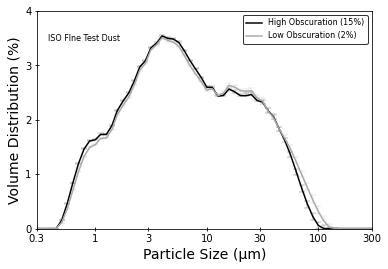

In [3]:
########################
### Step 2: Plotting ###
########################

plt.figure()
plt.errorbar(df['Size'], df.iloc[:,1], yerr = [df.iloc[:,3] , df.iloc[:,4]], xerr = None, 
             capsize = 3, c = "k", ecolor = 'k', elinewidth = 0.25, capthick = 0.25, label = 'High Obscuration (15%)')

plt.errorbar(df['Size'], df.iloc[:,2], yerr = [df.iloc[:,5] , df.iloc[:,6]], xerr = None, 
             capsize = 3, c = "darkgray", ecolor = 'darkgray', elinewidth = 0.25, capthick = 0.25, label = 'Low Obscuration (2%)')

plt.xscale('log')

plt.xlim(0.3, 300)
a = [0.3, 1, 3, 10, 30, 100, 300]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 4)
plt.yticks(np.arange(0, 5, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 8)

plt.text(0.8,3.5,'ISO FIne Test Dust', ha = 'center', va = 'center', fontsize = 8)
plt.savefig(r'FigureS5.jpg', format='jpg', dpi=1600, bbox_inches='tight')
